# Exploratory Data Analysis

## Diego Ramírez

### ¿Qué factores están relacionados con que los pasajeros del Titanic tengan una mayor/menor probabilidad de sobrevivir?

### Exportación y análisis inicial

Importamos las librerías a utilizar e importamos la base de datos correspondiente.

In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

df = pd.read_csv(url)

Analizamos en una primera instancia la base de datos obtenida y realizamos unos ajustes iniciales de la misma.

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Configuración del data set: {}".format(df.shape))

Configuración del data set: (891, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print("Nombre de las columnas en la data: {}".format(list(df.columns)))

Nombre de las columnas en la data: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### Preparación de datos

La variable "PassengerId" corresponde a un identificador único para cada pasajero, por lo que la colocamos como índice de nuestros datos.

In [8]:
df = df.set_index("PassengerId")

Con motivos prácticos para futura manipulación, modificamos los nombres de las columnas según preferencias personales.

In [9]:
nuevas_columnas = ["survived", "clase", "nombre", "sexo", "edad", "sib_sp", "parch", "ticket", "tarifa", "cabina", "embarque"]

df.columns = nuevas_columnas

Se crea una nueva variable con la edad dividida por rangos y se crea una nueva variable a partir del "pronombre" que acompaña a cada pasajero en su "nombre".

<div class="alert alert-block alert-info">
    <b>Note: Consideramos que se pudiese obtener información valiosa de "Nombre".</b>
</div>

In [10]:
def edad_ran(edad):
    """"Agrupa la edad según cuatro (4) distintos intervalos de 20 años cada uno.
    
    Args:
    
    edad (int)"""
    
    rango = ""
    
    if edad < 20:
        rango = "0 - 19"
    elif edad < 40:
        rango = "20 - 39"
    elif edad < 60:
        rango = "40 - 59"
    else:
        rango = "60 - 80"
        
    return rango

In [11]:
df["edad_ran"] = df["edad"].apply(edad_ran)
df["edad_ran"].value_counts()

20 - 39    387
60 - 80    203
0 - 19     164
40 - 59    137
Name: edad_ran, dtype: int64

Obtenemos una primera noción de la distribución de nuestros datos en nuestra nueva categoría, concentrandose mayormente en el rango entre 20-39 años y menormente en el rango entre 40-59 año.

In [12]:
df["pronombre"] = df["nombre"].apply(lambda x: x.split(", ")[1].split(" ")[0])

df["pronombre"].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: pronombre, dtype: int64

Los datos se concentran en cuatro (4) principales "pronombres", siendo "Mr." el más frecuente (moda).

In [13]:
df[["edad_ran","pronombre"]]

,edad_ran,pronombre
PassengerId,,
1,20 - 39,Mr.
2,20 - 39,Mrs.
3,20 - 39,Miss.
4,20 - 39,Mrs.
5,20 - 39,Mr.
...,...,...
887,20 - 39,Rev.
888,0 - 19,Miss.
889,60 - 80,Miss.


<div class="alert alert-block alert-info">
    <b>Note: Obtenemos una representación visual de las nuevas variables.</b>
</div>

### Manejo de valores nulos

Evaluamos los valores nulos presentes en la data

In [14]:
df.isnull().sum()

survived       0
clase          0
nombre         0
sexo           0
edad         177
sib_sp         0
parch          0
ticket         0
tarifa         0
cabina       687
embarque       2
edad_ran       0
pronombre      0
dtype: int64

Únicamente hay tres (3) variables con valores nulos, siendo "cabina" la categoría con más valores nulos presentes.

In [15]:
df["cabina"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: cabina, Length: 147, dtype: int64

La mayoría de los valores nulos de "cabina" están presentes en pasajeros con clase "3".

In [16]:
df[df["cabina"].isnull() == False]["clase"].value_counts()

1    176
2     16
3     12
Name: clase, dtype: int64

Por otro lado, la mayoría de datos no nulos se encuentran en pasajeros con clase "1".

In [17]:
df[df["cabina"].isnull() == False]["survived"].value_counts()

1    136
0     68
Name: survived, dtype: int64

A pesar de que se pudiese segmentar la variable extrayendo la primera letra de cada valor, consideramos que la información aportada por esta variable no es suficiente por la gran cantidad de valores nulos presentes en ella.

Por ende, eliminaremos la variable "cabina" del dataset original.

In [18]:
df.drop("cabina", axis=1, inplace= True)

La segunda variable con mayor cantidad de nulos es "edad". Por las características del tipo de datos, creemos conveniente reemplazar los valores nulos por la media de la segmentación correspondiente a alguna otra característica que si tengamos a disposición.

In [19]:
df["edad"].isnull().sum()

177

<div class="alert alert-block alert-info">
    <b>Note: La segmentación por "sexo" podría ser muy general, por lo que dentro de las opciones disponibles "pronombre" es la más adecuada.</b>
</div>

In [20]:
df[df["edad"].isnull() == True ]["pronombre"].value_counts()

Mr.        119
Miss.       36
Mrs.        17
Master.      4
Dr.          1
Name: pronombre, dtype: int64

Se puede observar que la mayoría de los valores nulos de "edad" corresponden a su vez a los principales "pronombres".

In [21]:
df[(df.pronombre == "Mr.") | (df.pronombre == "Miss.") | (df.pronombre == "Mrs.") | (df.pronombre == "Master.") | (df.pronombre == "Dr.")].groupby("pronombre")["edad"].mean()


pronombre
Dr.        42.000000
Master.     4.574167
Miss.      21.773973
Mr.        32.368090
Mrs.       35.898148
Name: edad, dtype: float64

Cada "pronombre" (con valores nulos presentes) posee una media de edad distinta. Por ende, reemplazamos los valores nulos de "edad" con su media según su "pronombre" correspondiente.

<div class="alert alert-block alert-info">
    <b>Note: Aprovechamos la función para redondear los valores de "edad" a la unidad más próxima.</b>
</div>

In [22]:
def media(edad, pronombre):
    
    """"Reemplaza los valores nulos de la edad con la media correspondiente a su pronombre.
    
    Args:
    
    edad (int)
    pronombre (str)"""
    
    media = dict(df.groupby("pronombre")["edad"].mean())
    
    for x in media:
        media[x] = round(media[x])
    
    if pd.isna(edad) == True:
        edad = media[pronombre]
    else:
        edad = round(edad)
    return edad

In [23]:
df["edad"] = df.apply(lambda x: media(x["edad"], x["pronombre"]), axis = 1)

Comprobamos nuevamente la presencia de valores nulos en la data. En este caso, únicamente presentes en "embarque", por lo que procedemos a evaluar la variable en cuestión.

In [24]:
df[df["embarque"].isnull()]

,survived,clase,nombre,sexo,edad,sib_sp,parch,ticket,tarifa,embarque,edad_ran,pronombre
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,NaN,20 - 39,Miss.
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,NaN,60 - 80,Mrs.


Ambos valores nulos presentan características similares, en cuanto a "survived", "clase", "sexo" y "tarifa".

In [25]:
df["embarque"].value_counts()

S    644
C    168
Q     77
Name: embarque, dtype: int64

El tipo de embarque más repetido (moda) es del tipo "S".

In [26]:
df.groupby("embarque")["clase"].value_counts()

embarque  clase
C         1         85
          3         66
          2         17
Q         3         72
          2          3
          1          2
S         3        353
          2        164
          1        127
Name: clase, dtype: int64

Ambos valores nulos son de clase 1, para la cual el tipo de embarque más común es el "S".

In [27]:
df[df["tarifa"] >= 80]["embarque"].value_counts()

C    38
S    34
Q     2
Name: embarque, dtype: int64

Según el precio de "tarifa" el embarque más común es de tipo "C" seguido de tipo "S" (sin una diferencia realmente significativa).

Finalmente, creemos más conveniente sustituir los valores restantes por la moda, ya que no se demostró alguna característica que pudiese ser más explicativa de los valores restantes.

In [28]:
# Creamos una lista con el valor de la moda
moda_embarque = list(df["embarque"].mode())[0]

#Reemplazamos el valor correspondiente
df["embarque"].fillna(moda_embarque, inplace = True)

In [29]:
df.isnull().sum()

survived     0
clase        0
nombre       0
sexo         0
edad         0
sib_sp       0
parch        0
ticket       0
tarifa       0
embarque     0
edad_ran     0
pronombre    0
dtype: int64

<div class="alert alert-block alert-info">
    <b>Note: Se han reemplazado todos los valores nulos presentes en la muestra.</b>
</div>

### Tratamiento de outliers

Dentro de las variables numéricas presentes en nuestra data set, se encuentran presentes variables categóricas nominales (survived) y ordinales (clase, sib_sp, parch).

Por ende, procedemos a evaluar la presencia de outliers dentro de las variables edad y tarifa.


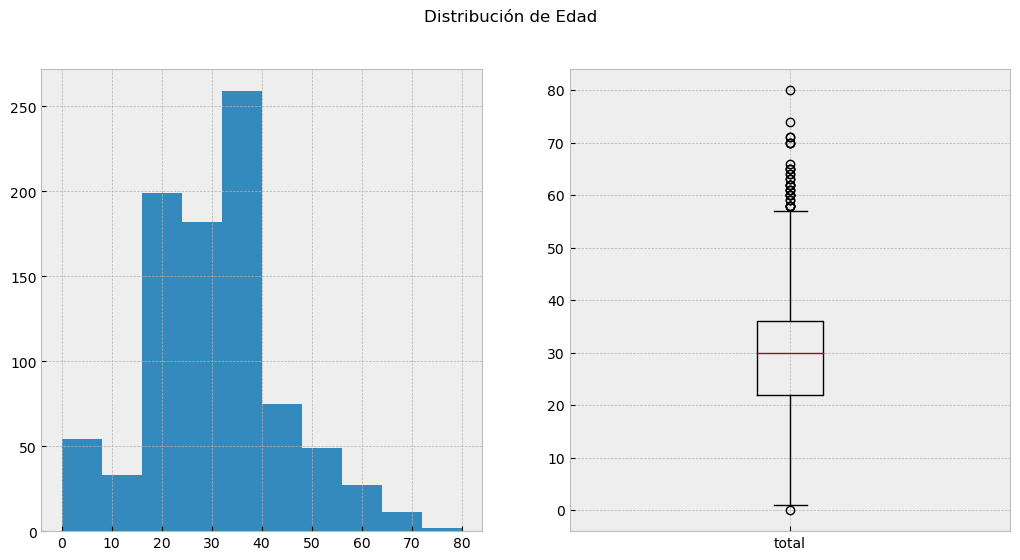

In [30]:
# Configuramos el espacio del gráfico
plt.figure(figsize = (12.5,6))

# Configuramos el estilo predeterminado del gráfico
plt.style.use(["bmh"])

# Creamos la data a introducir al gráfico
edad = df["edad"]

# Creamos el primer gráfico
plt.subplot(121)
plt.hist(edad)

# Creamos el segundo gráfico
plt.subplot(122)
plt.boxplot( edad , vert = True , labels = ["total"])

# Configuramos el título
plt.suptitle("Distribución de Edad")

plt.show()

<div class="alert alert-block alert-info">
    <b>Note: Para evaluar los outliers en la muestra, los distinguiremos entre valores atípicos (valores posibles pero poco comúnes) y valores anomalos (valores no posibles).</b>
</div>

En el histograma de la izquierda se observa la distrubución de la muestra, en donde se puede apreciar que los outliers de la data se concentran en los pasajeros con mayor edad. Lo mismo se puede observar en el boxplot de la derecha, en donde consideramos outliers valores por encima de 1,5 x Rango Intercuartílico (puntos con bordes negros de la gráfica).

In [31]:
edad_max = df["edad"].max()
edad_min = df["edad"].min()
edad_mean = round(df["edad"].mean())
edad_q3, edad_q1 = np.percentile(np.array(edad), [75, 25])
edad_rang = edad_max - edad_min
edad_iqr = edad_q3 - edad_q1


print("Máximo de edad:", edad_max)
print("Mínimo de edad:", edad_min)
print("Media de edad:", edad_mean)
print("Rango intercuartílico:", edad_iqr)

Máximo de edad: 80
Mínimo de edad: 0
Media de edad: 30
Rango intercuartílico: 14.0


El rango de "edad" en una primera instancia no parece anomalo, por lo que asumiremos los outliers como valores atípicos.

Procedemos a evaluar la segunda variable numérica con posibles outliers.

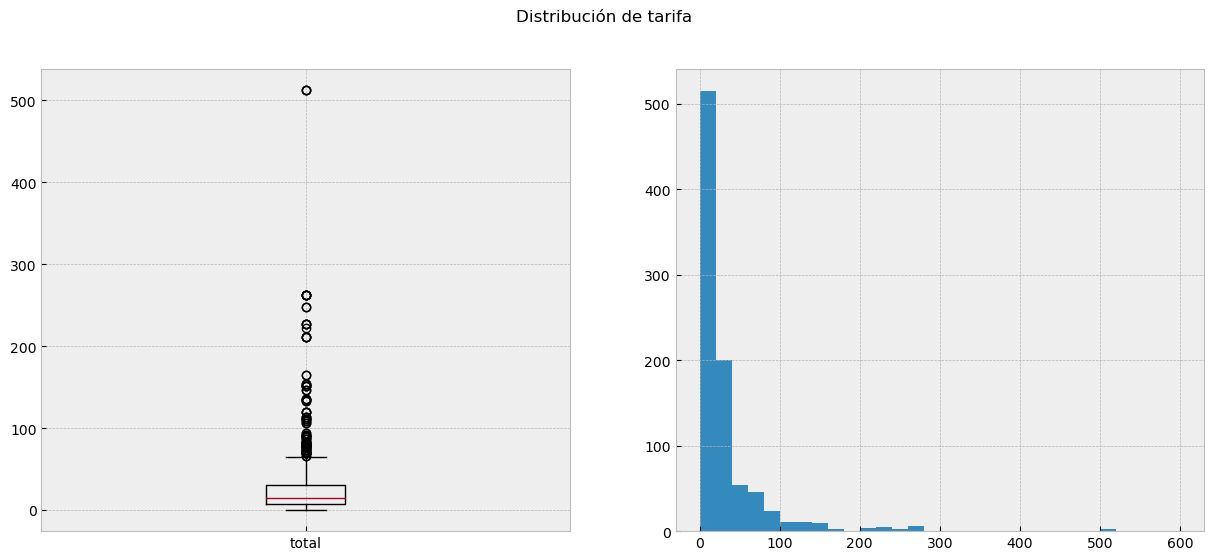

In [32]:
# Configuramos el espacio del gráfico
plt.figure(figsize = (15,6))
plt.style.use(["bmh"])

# Creamos la data a introducir al gráfico
tarifa = df["tarifa"]

# Creamos el primer gráfico
plt.subplot(121)
plt.boxplot( tarifa , vert = True , labels = ["total"])

# Creamos el segundo gráfico
plt.subplot(122)
tar_bins = list(np.arange(0,620,20))
plt.hist(tarifa, bins = tar_bins )

# Configuramos el título
plt.suptitle("Distribución de tarifa")

plt.show()

Se puede apreciar como la variable "tarfifa" presenta valores atípicos. A pesar de que alguno de estos valores son extremadamente mayores que el rango intercuartílico, aún es posible que la tarifa en sí no sea anomala (posea algún tipo de error).

Sin embargo, a fines analíticos, modificaremos la variable original substituyendo los outliers extremos ( mayor / menor a Rango Intercuartílico * 3 ) por el mayor/menor valor de este intervalo.

In [33]:
def tarifa_outlier(tarifa):
    """"Reemplaza los outliers (mayor/menor que Q3/Q1 +/- Rango intercuartílico) de la tarifa con el valor 
    máximo/mínimo del rango.
    
    Args:
    
    tarifa (int)"""
    
    # Creamos un array de la variable tarifa
    tarifa_array = np.array(df["tarifa"])
    
    # Utilizamos la función de numpy para los arrays para obtener los cuartíles.
    tarifa_q3, tarifa_q1 = np.percentile(tarifa_array, [75, 25])
    
    # Definimos el rango intercuartílico.
    tarifa_iqr = tarifa_q3 - tarifa_q1
    
    # Creamos los valores máximos y mínimos permitidos
    max_var = tarifa_q3 + round((tarifa_iqr) * 3) 
    min_var = tarifa_q1 - round((tarifa_iqr) * 3)
    
    if tarifa > max_var:
        tarifa = max_var
    elif tarifa < min_var:
        tarifa = min_var
    else:
        tarifa = tarifa
    return tarifa
    

In [34]:
df["tarifa"] = df["tarifa"].apply(tarifa_outlier)

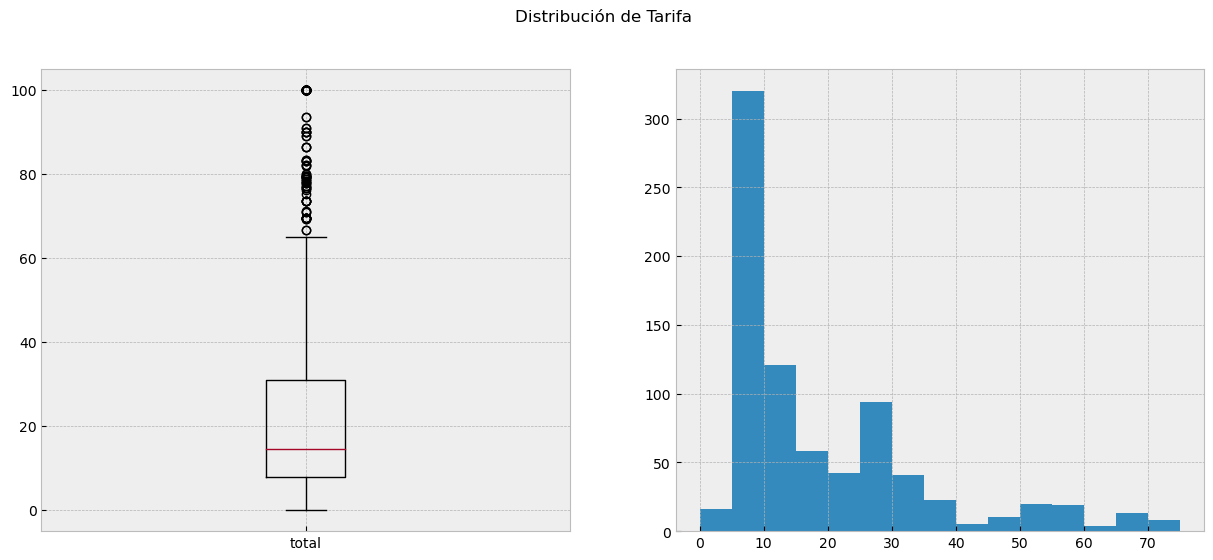

In [35]:
# Configuramos el espacio del gráfico
plt.figure(figsize = (15,6))

# Creamos la data a introducir al gráfico
tarifa = df["tarifa"]

# Creamos el primer gráfico
plt.subplot(121)
plt.boxplot(tarifa , vert = True , labels = ["total"])

# Creamos el segundo gráfico
plt.subplot(122)
tar_bins = list(np.arange(0,80,5))
plt.hist(tarifa, bins = tar_bins )

# Configuramos el título
plt.suptitle("Distribución de Tarifa")

plt.show()

En ambos gráficos, se muestra como la presencia de outliers influencia en menor medida a la muestra, debido a que se concentrar en valores menos extremos a los originales (Rango intercuartílico*3).

<div class="alert alert-block alert-info">
    <b>Note: Tanto la variable de "tarifa" como de "edad" se normalizaran antes de introducirse al modelo.</b>
</div>

### Descripción estadística de los datos y visualización

### Análisis univariado de variables categóricas

Con fines de comprender a mayor profundidad nuestro dataset, realizaremos un análisis univariado previo a la comparativa con nuestra variable hipótesis (survived).

De esta manera, podremos abordar la pregunta principal de una manera más adecuada.

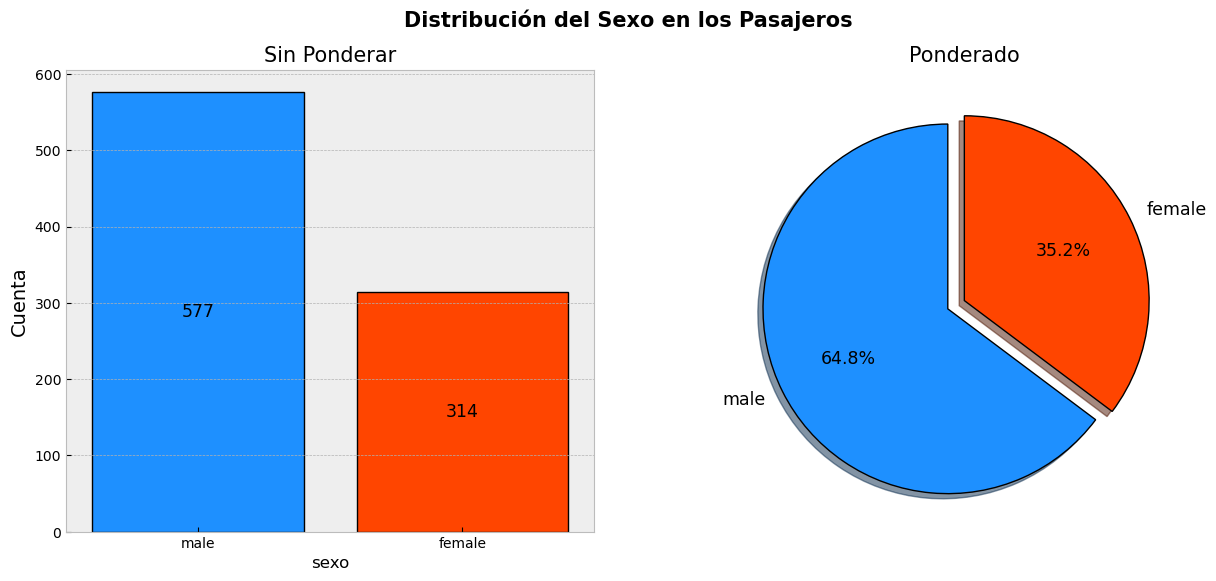

In [36]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Configuramos un estilo general

plt.style.use(["bmh"])

# Creamos el dataset
sexo = df["sexo"].value_counts()
sexo_label= list(df["sexo"].unique())

# Creamos los colores
colors = ["dodgerblue", "orangered"]

# Creamos otras propiedades del pie
wp = {"linewidth": 1, "edgecolor": "black"}

# Creamos los argumentos de autocpt
def ponderado(var):
    var_ponderado = var
    return "{:.1f}%".format(var_ponderado)

# Creamos explode (efecto visual)
explode = (0.1, 0.0)

# Creamos efecto para el texto
texto_drop = dict(size = 12.5)


# Creamos el primer gráfico
plt.subplot(121)
count_sexo = sns.countplot(x= "sexo", data = df, palette = colors, linewidth = 1, edgecolor= "black", saturation=1)
plt.bar_label(count_sexo.containers[0], size = 12.5, label_type= "center")
plt.ylabel("Cuenta", size= 14)


# Creamos el segundo gráfico
plt.subplot(122)
plt.pie(sexo, autopct = lambda var: ponderado(var), labels = sexo_label, shadow = True, wedgeprops = wp, startangle = 90, explode = explode, textprops = texto_drop, colors = colors)


# Agregamos títulos personalizados a cada gráfico
axes[1].set_title("Ponderado", size = 15)
axes[0].set_title("Sin Ponderar", size = 15)
plt.suptitle("Distribución del Sexo en los Pasajeros", size = 15, weight = "bold")

plt.show()

Existe una clara diferencia entre los pasajeros hombres (64,8%) y las mujeres (35,2%).

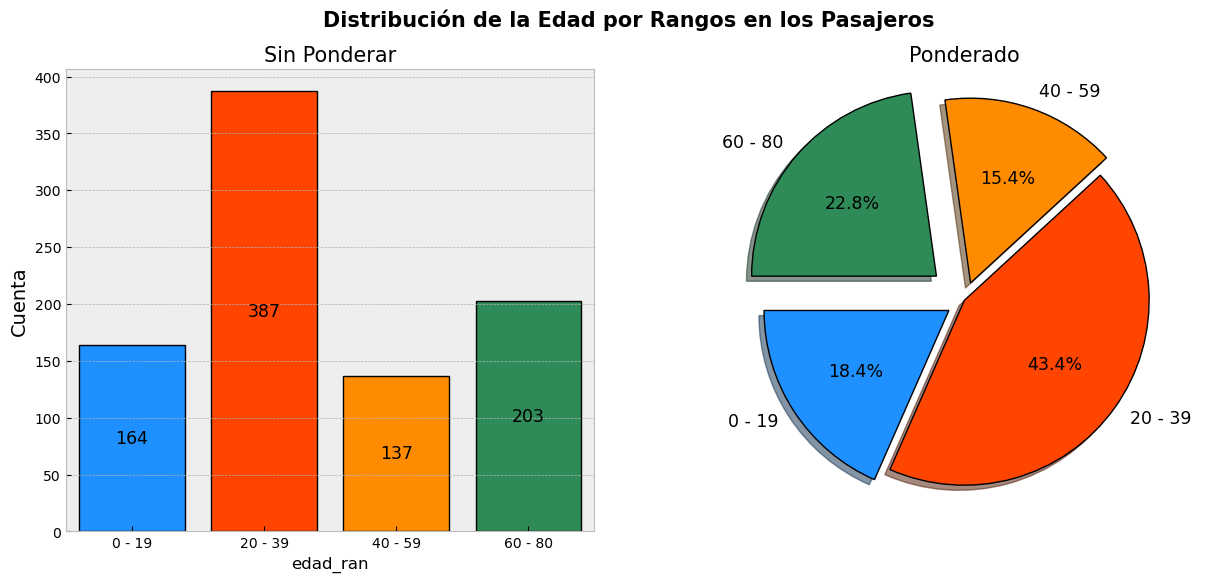

In [37]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Configuramos un estilo general

plt.style.use(["bmh"])

# Creamos el dataset
edad_ran = df.sort_values(by=["edad_ran"])["edad_ran"].value_counts(sort= False)
edad_ran_label= list(df.sort_values(by=["edad_ran"])["edad_ran"].unique())

# Creamos los colores
colors = ["dodgerblue", "orangered", "darkorange", "seagreen"]

# Creamos otras propiedades del pie
wp = {"linewidth": 1, "edgecolor": "black"}

# Creamos los argumentos de autocpt
def ponderado(var):
    var_ponderado = var
    return "{:.1f}%".format(var_ponderado)

# Creamos explode (efecto visual)
explode = (0.1, 0.0, 0.1, 0.2)

# Creamos efecto para el texto
texto_drop = dict(size = 12.5)


# Creamos el primer gráfico
plt.subplot(121)
count_edad_ran = sns.countplot(x= "edad_ran", data = df, palette = colors, linewidth = 1, edgecolor= "black", order= edad_ran_label, saturation=1)
plt.bar_label(count_edad_ran.containers[0], size = 12.5, label_type= "center")
plt.ylabel("Cuenta", size= 14)


# Creamos el segundo gráfico
plt.subplot(122)
plt.pie(edad_ran, autopct = lambda var: ponderado(var), labels = edad_ran_label, shadow = True, wedgeprops = wp, startangle = 180, explode = explode, textprops = texto_drop, colors = colors)


# Agregamos títulos personalizados a cada gráfico
axes[1].set_title("Ponderado", size = 15)
axes[0].set_title("Sin Ponderar", size = 15)
plt.suptitle("Distribución de la Edad por Rangos en los Pasajeros", size = 15, weight = "bold")

plt.show()

Al realizar la comparativa según el rango de edad, observamos que la mayor parte de los pasajeros se encuentra entre los 20-39 años (43,4%) seguido del rango de los 60-80 años (22,8%).

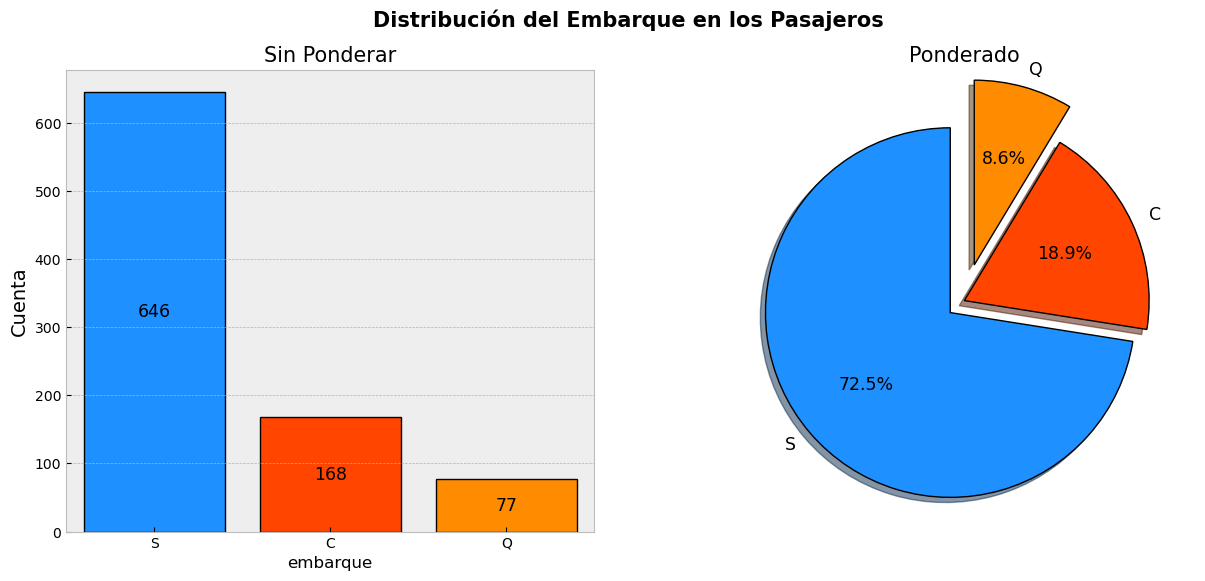

In [38]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Configuramos un estilo general

plt.style.use(["bmh"])

# Creamos el dataset
embarque = df["embarque"].value_counts()
embarque_label= list(df["embarque"].unique())

# Creamos los colores
colors = ["dodgerblue", "orangered", "darkorange"]

# Creamos otras propiedades del pie
wp = {"linewidth": 1, "edgecolor": "black"}

# Creamos los argumentos de autocpt
def ponderado(var):
    var_ponderado = var
    return "{:.1f}%".format(var_ponderado)

# Creamos explode (efecto visual)
explode = (0.1, 0.0, 0.2)

# Creamos efecto para el texto
texto_drop = dict(size = 12.5)


# Creamos el primer gráfico
plt.subplot(121)
count_embarque = sns.countplot(x= "embarque", data = df, palette = colors, linewidth = 1, edgecolor= "black", saturation=1)
plt.bar_label(count_embarque.containers[0], size = 12.5, label_type= "center")
plt.ylabel("Cuenta", size= 14)


# Creamos el segundo gráfico
plt.subplot(122)
plt.pie(embarque, autopct = lambda var: ponderado(var), labels = embarque_label, shadow = True, wedgeprops = wp, startangle = 90, explode = explode, textprops = texto_drop, colors = colors)


# Agregamos títulos personalizados a cada gráfico
axes[1].set_title("Ponderado", size = 15)
axes[0].set_title("Sin Ponderar", size = 15)
plt.suptitle("Distribución del Embarque en los Pasajeros", size = 15, weight = "bold")

plt.show()

El tipo de embarque más común fue el tipo "S" (72,5%), superando incluso la sumatoría de las dos categorías restantes "C" (18,9%) y "Q" (8,6%).

Σ(C + Q) = 27,5%

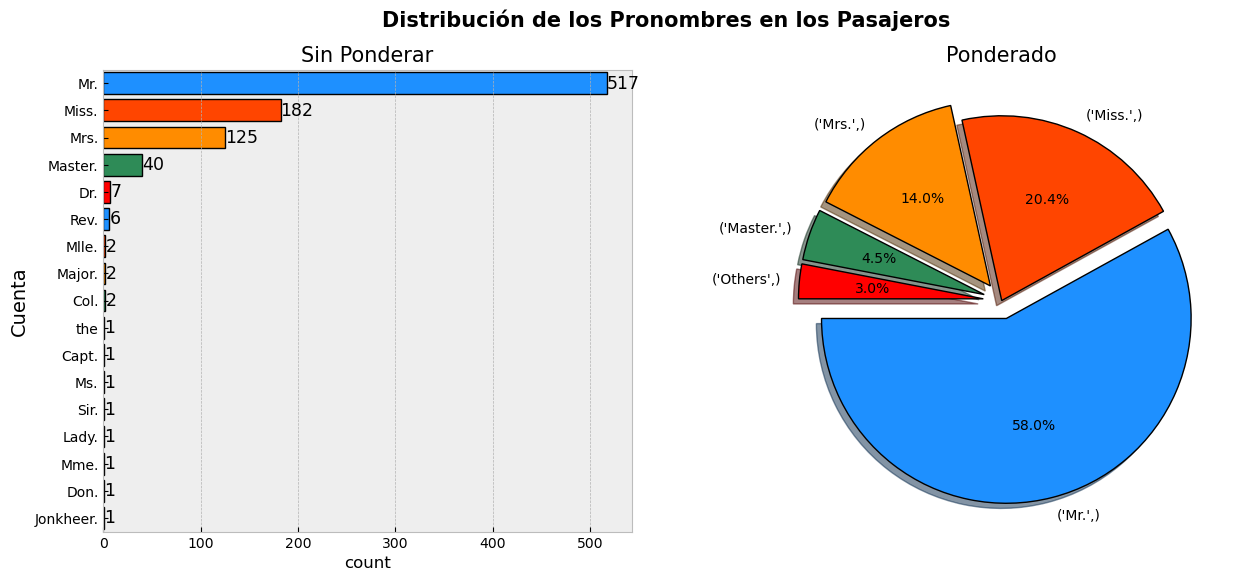

In [39]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Configuramos un estilo general

plt.style.use(["bmh"])

# Creamos una subdivisión de la variable con motivos visuales
pronombres_principales= list(df[(df.pronombre == "Mr.") | (df.pronombre == "Miss.") | (df.pronombre == "Mrs.") | (df.pronombre == "Master.")]["pronombre"])
pronombres_secundarios= list(df[(df.pronombre != "Mr.") & (df.pronombre != "Miss.") & (df.pronombre != "Mrs.") & (df.pronombre != "Master.")]["pronombre"])
others= ["Others" for x in pronombres_secundarios]
pronombres_nuevos= pd.DataFrame(np.array(pronombres_principales + others)).value_counts()

# Creamos el dataset
pronombre = df["pronombre"].value_counts(sort= True)
pronombre_label= list(df["pronombre"].value_counts(sort= True).index)
pronombre_label_nuevo= list(pronombres_nuevos.index)

# Creamos los colores
colors = ["dodgerblue", "orangered", "darkorange", "seagreen", "red"]

# Creamos otras propiedades del pie
wp = {"linewidth": 1, "edgecolor": "black"}

# Creamos los argumentos de autocpt
def ponderado(var):
    var_ponderado = var
    return "{:.1f}%".format(var_ponderado)

# Creamos explode (efecto visual)
explode = (0.1, 0.0, 0.1, 0.1, 0.1)

# Creamos efecto para el texto
texto_drop = dict(size = 10)

# Creamos el primer gráfico
plt.subplot(121)
count_pronombre = sns.countplot(y= "pronombre", data = df, palette = colors, linewidth = 1, edgecolor= "black", order= pronombre_label, saturation=1)
plt.bar_label(count_pronombre.containers[0], size = 12.5, label_type= "edge")
plt.ylabel("Cuenta", size= 14)


# Creamos el segundo gráfico
plt.subplot(122)
plt.pie(pronombres_nuevos, autopct = lambda var: ponderado(var), labels = pronombre_label_nuevo, shadow = True, wedgeprops = wp, startangle = 180, explode = explode, textprops = texto_drop, colors = colors)


# Agregamos títulos personalizados a cada gráfico
axes[1].set_title("Ponderado", size = 15)
axes[0].set_title("Sin Ponderar", size = 15)
plt.suptitle("Distribución de los Pronombres en los Pasajeros", size = 15, weight = "bold")

plt.show()

<div class="alert alert-block alert-info">
    <b>Note: Se creó una subdivisión de la variable para introducirla al gráfico de pie.</b>
</div>

El pronombre más común con diferencia fue el de "Mr." (58%) seguido de "Miss." (20,4%).

Sin embargo, esta diferencia tan notable se pudiese deber a la composición de la variable en sí: para las mujeres hay presentes dos categorías generales (Miss y Mrs) mientras que para los hombres sólo una (Mr). El resto de categorías hacen referencia a títulos profesionales/académicos/sociales más específicos.

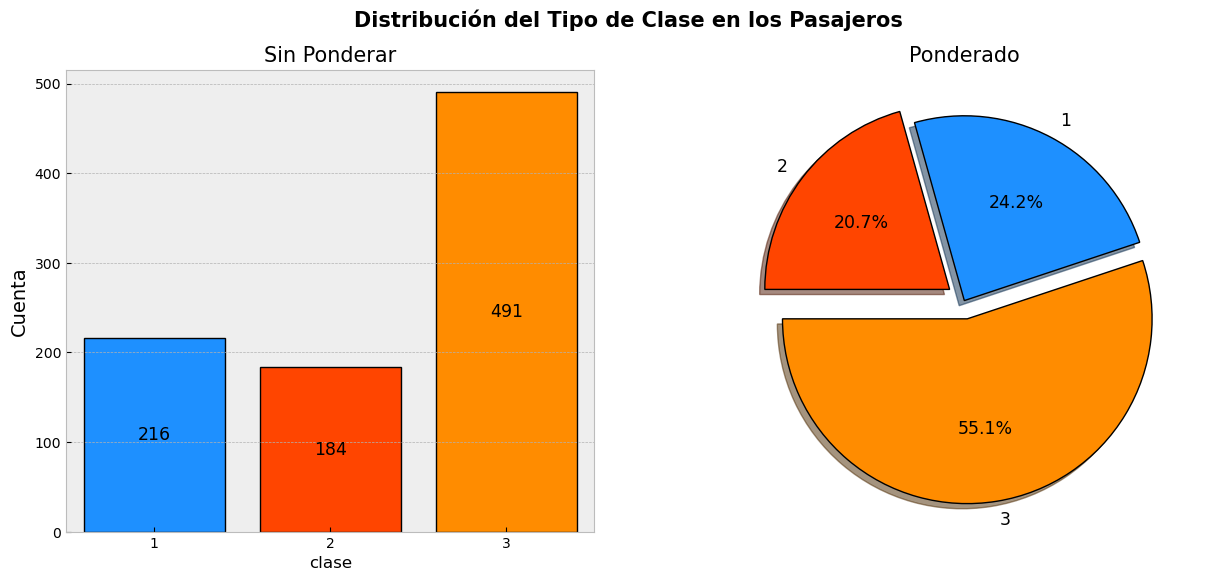

In [40]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Configuramos un estilo general

plt.style.use(["bmh"])

# Creamos el dataset
clase = df["clase"].value_counts()
clase_label= list(df["clase"].unique())

# Creamos los colores
colors = ["dodgerblue", "orangered", "darkorange"]
colors_2 = ["darkorange", "dodgerblue", "orangered"]

# Creamos otras propiedades del pie
wp = {"linewidth": 1, "edgecolor": "black"}

# Creamos los argumentos de autocpt
def ponderado(var):
    var_ponderado = var
    return "{:.1f}%".format(var_ponderado)

# Creamos explode (efecto visual)
explode = (0.1, 0.0, 0.1)

# Creamos efecto para el texto
texto_drop = dict(size = 12.5)


# Creamos el primer gráfico
plt.subplot(121)
count_clase = sns.countplot(x= "clase", data = df, palette = colors, linewidth = 1, edgecolor= "black", saturation=1)
plt.bar_label(count_clase.containers[0], size = 12.5, label_type= "center")
plt.ylabel("Cuenta", size= 14)


# Creamos el segundo gráfico
plt.subplot(122)
plt.pie(clase, autopct = lambda var: ponderado(var), labels = clase_label, shadow = True, wedgeprops = wp, startangle = 180, explode = explode, textprops = texto_drop, colors = colors_2)


# Agregamos títulos personalizados a cada gráfico
axes[1].set_title("Ponderado", size = 15)
axes[0].set_title("Sin Ponderar", size = 15)
plt.suptitle("Distribución del Tipo de Clase en los Pasajeros", size = 15, weight = "bold")

plt.show()

Más de la mitad de los pasajeros son de clase 3 (55,1%). Sin embargo, la clase 1 (24,2%) presenta mayor proporción que la clase 2 (20,7%).

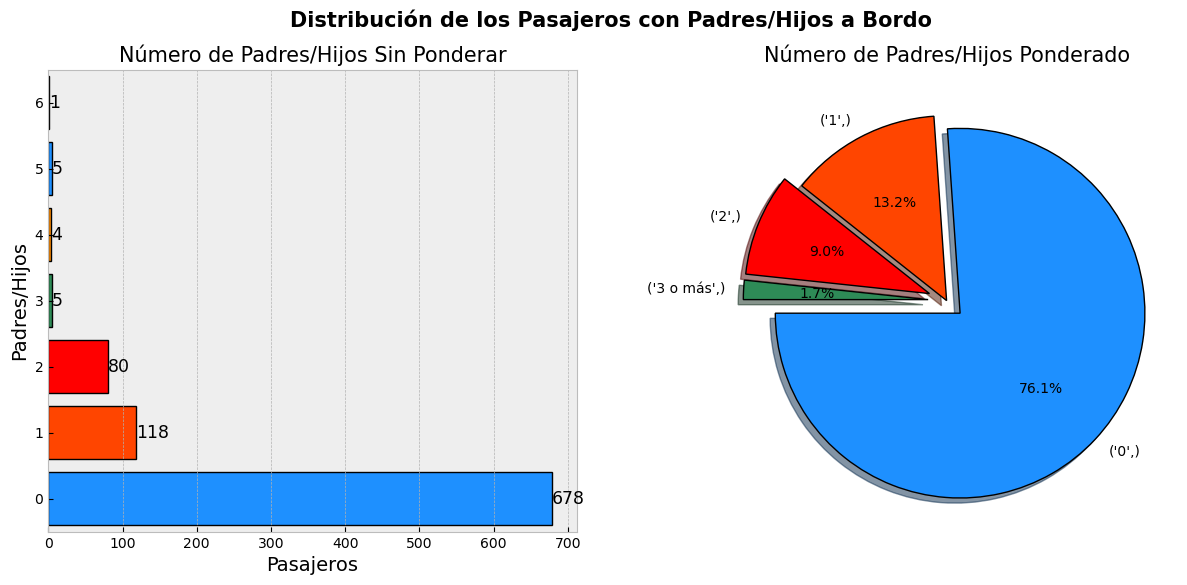

In [41]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Configuramos un estilo general

plt.style.use(["bmh"])

# Creamos una subdivisión de la variable con motivos visuales
parch_principales= list(df[(df.parch == 0) | (df.parch == 1) | (df.parch == 2)]["parch"])
parch_secundarios= list(df[(df.parch != 0) & (df.parch != 1) & (df.parch != 2)]["parch"])
other_parch= ["3 o más" for x in parch_secundarios]
parch_nuevos= pd.DataFrame(np.array(parch_principales + other_parch)).value_counts()

# Creamos el dataset
parch = df["parch"].value_counts(sort= True)
parch_label= list(df.sort_values(by= "parch", ascending= False)["parch"].value_counts(sort= False).index)
parch_label_nuevo= list(parch_nuevos.index)


# Creamos los colores
colors = [ "orangered", "dodgerblue", "darkorange", "seagreen", "red"]
colors_nuevo = [ "dodgerblue","orangered", "red", "seagreen"]

# Creamos otras propiedades del pie
wp = {"linewidth": 1, "edgecolor": "black"}

# Creamos los argumentos de autocpt
def ponderado(var):
    var_ponderado = var
    return "{:.1f}%".format(var_ponderado)

# Creamos explode (efecto visual)
explode = (0.1, 0.0, 0.1, 0.1)

# Creamos efecto para el texto
texto_drop = dict(size = 10)

# Creamos el primer gráfico
plt.subplot(121)
count_parch = sns.countplot(y= "parch", data = df, palette = colors, linewidth = 1, edgecolor= "black", order= parch_label, saturation=1)
plt.bar_label(count_parch.containers[0], size = 12.5, label_type= "edge")
plt.ylabel("Padres/Hijos", size= 14)
plt.xlabel("Pasajeros", size= 14)


# Creamos el segundo gráfico
plt.subplot(122)
plt.pie(parch_nuevos, autopct = lambda var: ponderado(var), labels = parch_label_nuevo, shadow = True, wedgeprops = wp, startangle = 180, explode = explode, textprops = texto_drop, colors = colors_nuevo)


# Agregamos títulos personalizados a cada gráfico
axes[1].set_title("Número de Padres/Hijos Ponderado", size = 15)
axes[0].set_title("Número de Padres/Hijos Sin Ponderar", size = 15)
plt.suptitle("Distribución de los Pasajeros con Padres/Hijos a Bordo", size = 15, weight = "bold")

plt.show()

<div class="alert alert-block alert-info">
    <b>Note: Se creó una subdivisión de la variable para introducirla al gráfico de pie.</b>
</div>

Los pasajeros sin padres/hijos a bordo representan la mayoría (76,1%) y, como es de esperarse, la frecuencia de los pasajeros disminuye a medida que aumenta el número de padres/hijos.

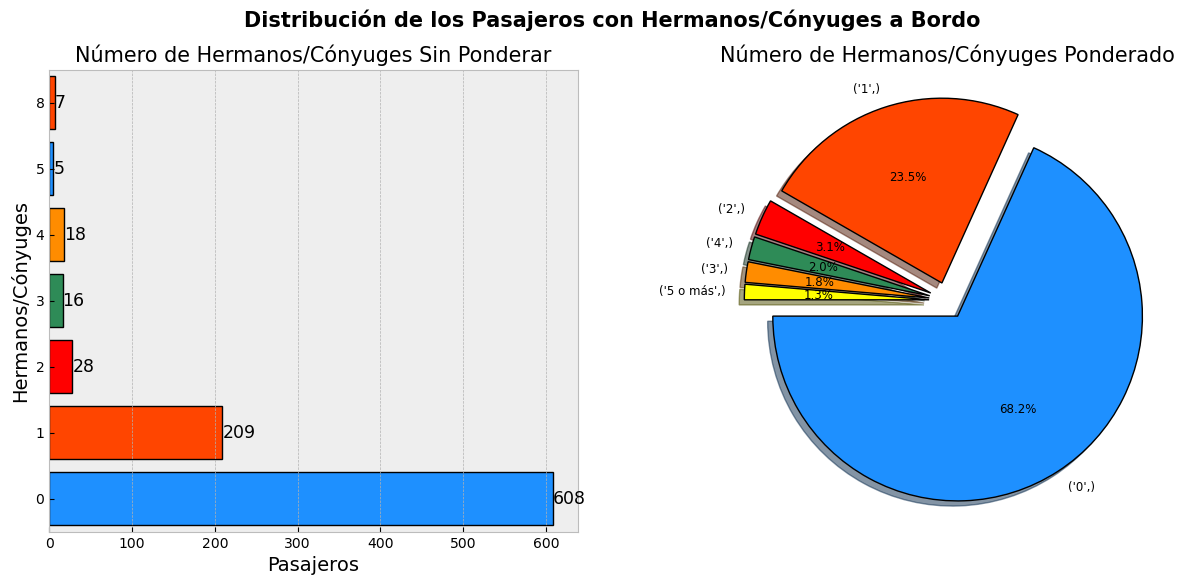

In [42]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Configuramos un estilo general

plt.style.use(["bmh"])

# Creamos una subdivisión de la variable con motivos visuales
sib_sp_principales= list(df[(df.sib_sp == 0) | (df.sib_sp == 1) | (df.sib_sp == 2) | (df.sib_sp == 3) | (df.sib_sp == 4)]["sib_sp"])
sib_sp_secundarios= list(df[(df.sib_sp != 0) & (df.sib_sp != 1) & (df.sib_sp != 2) & (df.sib_sp != 3) & (df.sib_sp != 4)]["sib_sp"])
other_sib_sp= ["5 o más" for x in sib_sp_secundarios]
sib_sp_nuevos= pd.DataFrame(np.array(sib_sp_principales + other_sib_sp)).value_counts()

# Creamos el dataset
sib_sp = df["sib_sp"].value_counts(sort= True)
sib_sp_label= list(df.sort_values(by= "sib_sp", ascending= False)["sib_sp"].value_counts(sort= False).index)
sib_sp_label_nuevo= list(sib_sp_nuevos.index)


# Creamos los colores
colors = [ "orangered", "dodgerblue", "darkorange", "seagreen", "red"]
colors_nuevo = [ "dodgerblue","orangered", "red", "seagreen", "darkorange", "yellow"]

# Creamos otras propiedades del pie
wp = {"linewidth": 1, "edgecolor": "black"}

# Creamos los argumentos de autocpt
def ponderado(var):
    var_ponderado = var
    return "{:.1f}%".format(var_ponderado)

# Creamos explode (efecto visual)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

# Creamos efecto para el texto
texto_drop = dict(size = 8.5)

# Creamos el primer gráfico
plt.subplot(121)
count_sib_sp = sns.countplot(y= "sib_sp", data = df, palette = colors, linewidth = 1, edgecolor= "black", order= sib_sp_label, saturation=1)
plt.bar_label(count_sib_sp.containers[0], size = 12.5, label_type= "edge")
plt.ylabel("Hermanos/Cónyuges", size= 14)
plt.xlabel("Pasajeros", size= 14)




# Creamos el segundo gráfico
plt.subplot(122)
plt.pie(sib_sp_nuevos, autopct = lambda var: ponderado(var), labels = sib_sp_label_nuevo, shadow = True, wedgeprops = wp, startangle = 180, explode = explode, textprops = texto_drop, colors = colors_nuevo)


# Agregamos títulos personalizados a cada gráfico
axes[1].set_title("Número de Hermanos/Cónyuges Ponderado", size = 15)
axes[0].set_title("Número de Hermanos/Cónyuges Sin Ponderar", size = 15)
plt.suptitle("Distribución de los Pasajeros con Hermanos/Cónyuges a Bordo", size = 15, weight = "bold")

plt.show()

<div class="alert alert-block alert-info">
    <b>Note: Se creó una subdivisión de la variable para introducirla al gráfico de pie.</b>
</div>

El comportamiento de la variable vinculada al número de hermanos/cónyuges a bordo es muy similar a la de padres/hijos (vista anteriormente). 

Siendo la diferencia principal el rango: hermanos/cónyuges (rango 8 - 0) y padres/hijos (rango 6 - 0).

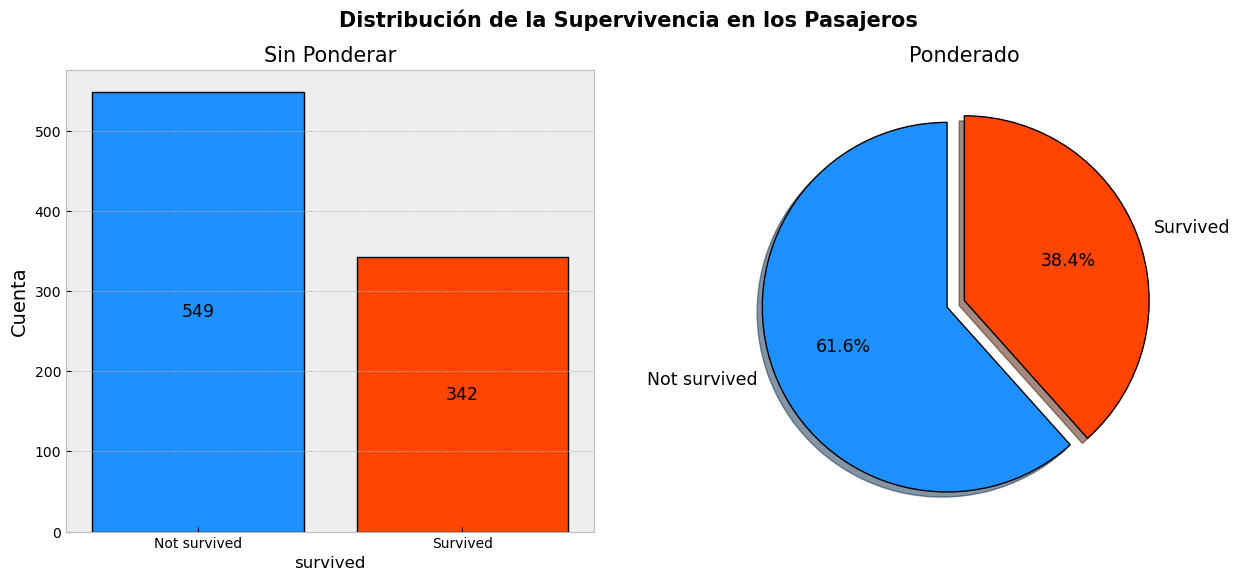

In [43]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Configuramos un estilo general

plt.style.use(["bmh"])

# Creamos el dataset
survived = df["survived"].value_counts()
survived_label= ["Not survived", "Survived"]

# Creamos los colores
colors = ["dodgerblue", "orangered"]

# Creamos otras propiedades del pie
wp = {"linewidth": 1, "edgecolor": "black"}

# Creamos los argumentos de autocpt
def ponderado(var):
    var_ponderado = var
    return "{:.1f}%".format(var_ponderado)

# Creamos explode (efecto visual)
explode = (0.1, 0.0)

# Creamos efecto para el texto
texto_drop = dict(size = 12.5)


# Creamos el primer gráfico
plt.subplot(121)
count_survived = sns.countplot(x= "survived", data = df, palette = colors, linewidth = 1, edgecolor= "black", saturation=1)
plt.bar_label(count_survived.containers[0], size = 12.5, label_type= "center")
axes[0].set_xticklabels(survived_label)

plt.ylabel("Cuenta", size= 14)


# Creamos el segundo gráfico
plt.subplot(122)
plt.pie(survived, autopct = lambda var: ponderado(var), labels = survived_label, shadow = True, wedgeprops = wp, startangle = 90, explode = explode, textprops = texto_drop, colors = colors)


# Agregamos títulos personalizados a cada gráfico
axes[1].set_title("Ponderado", size = 15)
axes[0].set_title("Sin Ponderar", size = 15)
plt.suptitle("Distribución de la Supervivencia en los Pasajeros", size = 15, weight = "bold")

plt.show()

Realizamos también un análisis general de nuestra variable hipótesis, donde observamos que la mayoría de los pasajeros no sobrevivieron (61,6%).

### Análisis univariado de variables numéricas

Continuamos nuestro análisis univariado con las variables numéricas.

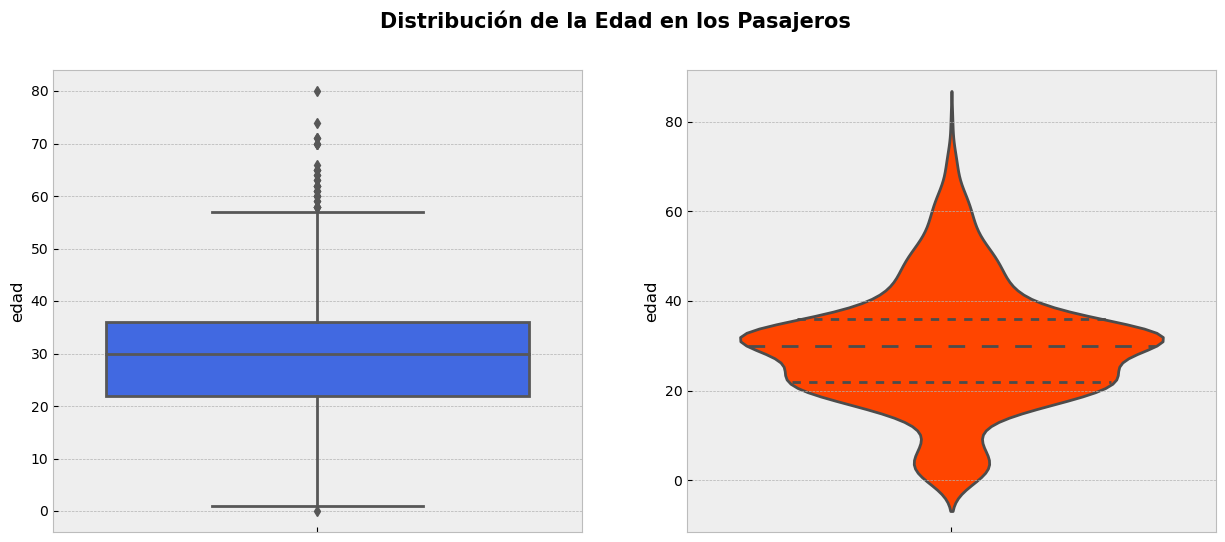

In [44]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Configuramos un estilo general

plt.style.use(["bmh"])

# Creamos el primer gráfico

plt.subplot(121)
box_edad = sns.boxplot(y= "edad", data = df, color = "royalblue", saturation=1)


# Creamos el segundo gráfico

plt.subplot(122)
violin_edad = sns.violinplot(y= "edad", data = df, color = "orangered", inner= "quartiles", saturation=1)



# Agregamos título
plt.suptitle("Distribución de la Edad en los Pasajeros", size = 15, weight = "bold")

plt.show()

Como vimos anteriormente en el análisis por rango, la concentración de la edad se encuentra dentro de los 20-40 años.

En el gráfico de la derecha podemos observar también un ligero engrosamiento crecano al cero, indicando los/as ninos/as presentes a bordo.

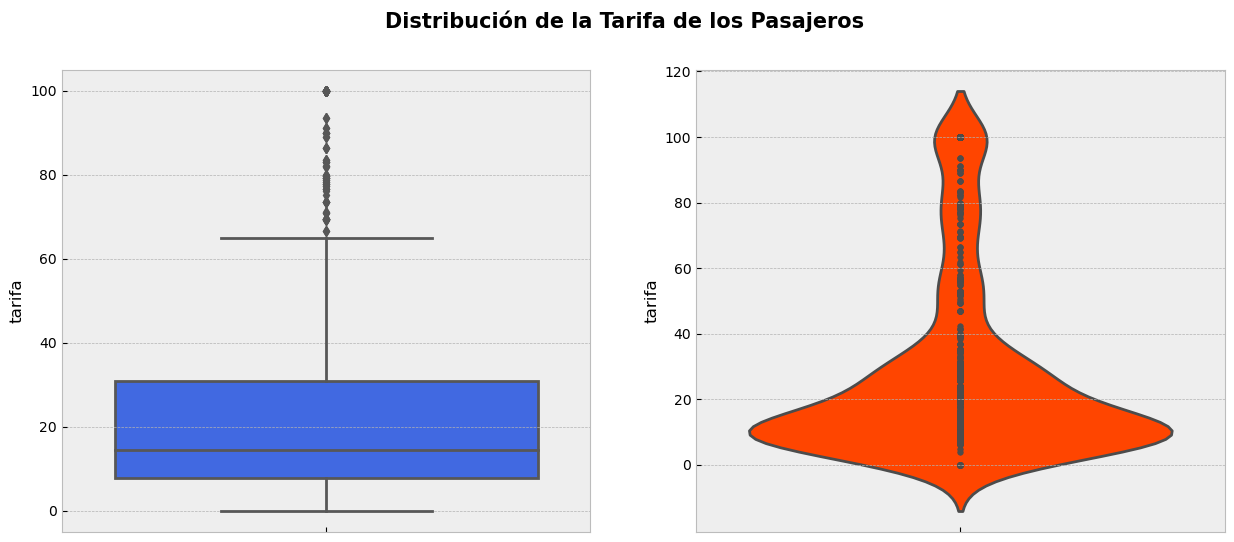

In [45]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Configuramos un estilo general

plt.style.use(["bmh"])

# Creamos el primer gráfico

plt.subplot(121)
box_tarifa = sns.boxplot(y= "tarifa", data = df, color = "royalblue", saturation=1)


# Creamos el segundo gráfico

plt.subplot(122)
violin_tarifa = sns.violinplot(y= "tarifa", data = df, color = "orangered", inner= "points", saturation=1)
axes[1].set_yticks(range(0, 140, 20))


# Agregamos título
plt.suptitle("Distribución de la Tarifa de los Pasajeros", size = 15, weight = "bold")

plt.show()

Con respecto a la tarifa, la media (línea negra dentro del cuadro azul del gráfico de la derecha) se encuentra por debajo de los 20€.

Como recordaremos los outliers extremos de esta variable fueron substituidos para disminuir su influencia en la muestra, sin embargo, aún puede observarse la gran diferencia entre el valor máximo presente (100€) y la media.

### Análisis multivariado

Finalmente, procederemos con el análisis directo de la pregunta: ¿Qué factores están relacionados con que los pasajeros tengan una mayor/menor probabilidad de sobrevivir?.

Primero, realizaremos una comparativa general de las variables numéricas con una matriz de correlaciones:

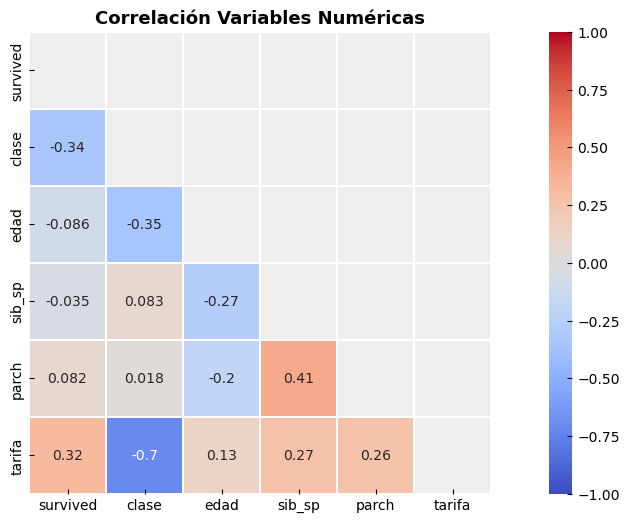

In [46]:
# Creamos la figura del gráficos

fig, axes= plt.subplots(figsize = (15,6))

# Creamos la matriz de correlación
corr_matrix= df.corr()

# Modificamos la matroz para efectos visuales
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True


# Creamos el gráfico de tipo heatmap
sns.heatmap(corr_matrix, annot=True, linewidths=.3, linecolor="white", vmin= -1, vmax=1,square= True,mask=mask, cmap="coolwarm" )
plt.title("Correlación Variables Numéricas", size = 13, weight = "bold")
plt.show()

<div class="alert alert-block alert-info">
    <b>Note: La correlación de pearson presenta valores entre -1 (correlación negativa) y 1 (correlación positiva). Presenta la relación entre variables directa (positiva) o inversa (negativa).</b>
</div>

Con respecto a nuestra variables hipótesis "survived", las mayores correlaciones se encuentran en la tarifa (0,32) y la clase (-0,34). El número de padres/hijos y de hermanos/cónyuges no presentan una correlación significativa.

Como es de esperarse, la tarifa y la clase están altamente correlacionadas (-0,7).

Otra correlación importante es la de padres/hijos y de hermanos/cónyuges (0,41) lo que representa la presencia de familias numerosas a bordo.

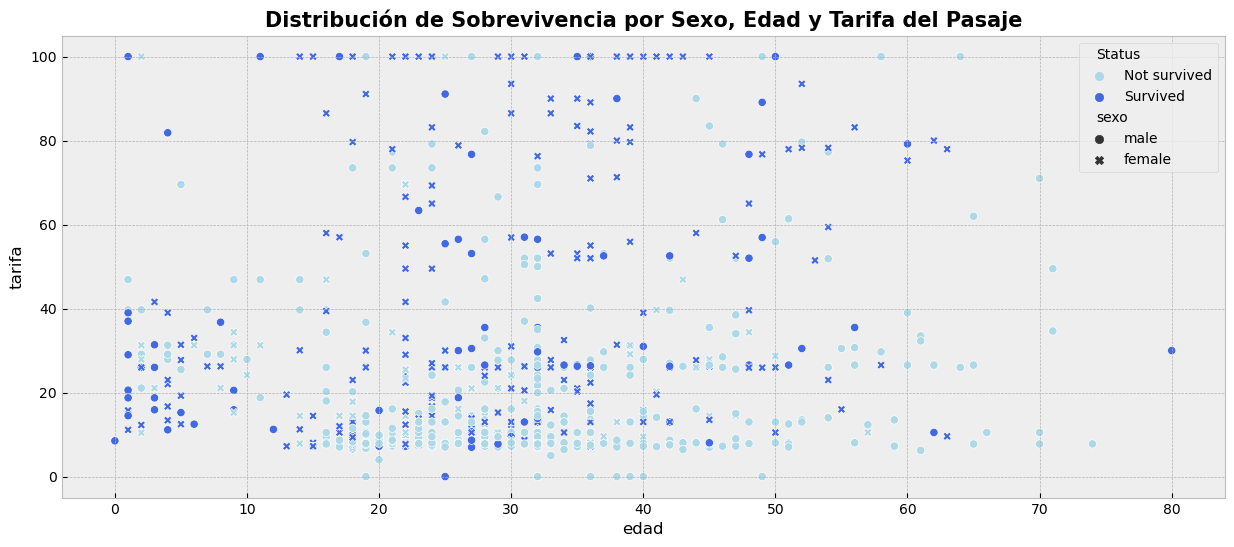

In [47]:
# Creamos la figura del gráficos
fig, axes= plt.subplots(figsize = (15,6))

# Creamos los colores
colors = ["LightBlue", "royalblue"]

plt.title("Distribución de Sobrevivencia por Sexo, Edad y Tarifa del Pasaje", size = 15, weight = "bold")

# Creamos el gráfico
axes_variado = sns.scatterplot(data=df, y="tarifa", x="edad", hue="survived", style="sexo", palette= colors, markers= {"female":"X", "male":"o"})

# Configuramos la leyenda
leyen = axes_variado.get_legend()
leyen.get_texts()[1].set_text('Not survived')
leyen.get_texts()[2].set_text('Survived')
leyen.get_texts()[0].set_text('Status')

plt.show()

<div class="alert alert-block alert-info">
    <b>Note: Los outliers de la variable "tarifa" se han substituido con fines analíticos por el valor de Q3 + (RQI * 3).</b>
</div>

Se puede observar a priori que la concentración principal de la tarifa se encuentra entre los 10-30 dólares, sin embargo a medida que la edad aumenta dicha concentración se va diluyendo. También, se puede observar como en dichas mayores concentraciones de pasajeros predominan los no sobrevivientes.

En el rango de 0-5 años se encuentra una concentración considerable de sobrevivientes. 

En cuanto a las tarifas más elevadas, los sobrevivientes se encuentran más presentes, siendo el sexo femenino el predominante en dicho rango.

A mayor tarifa la concentración de pasajeros disminuye considerablemente, y el color azul oscuro (sobrevivientes) empieza a tomar mayor representación.

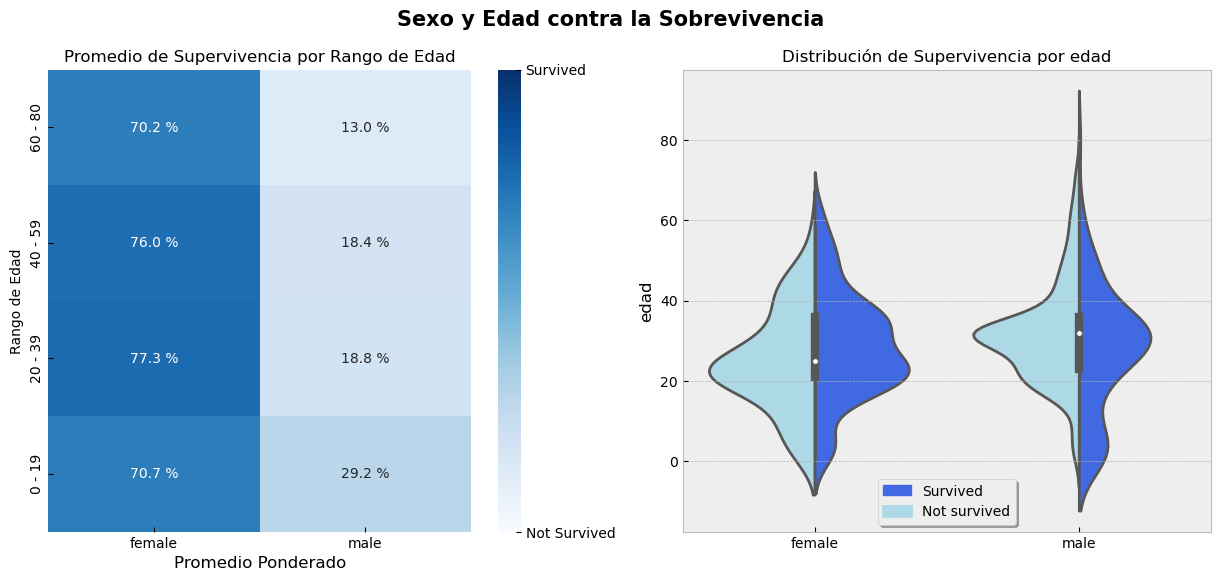

In [48]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Creamos la data a gráficar
sexo_edadran = df.pivot_table(values= "survived", index="edad_ran", columns="sexo", aggfunc='mean')
sexo_edadran_sorted = sexo_edadran.reset_index().sort_values(by= "edad_ran", ascending= False).set_index("edad_ran") * 100 # Ordenamos según el índice

# Creamos el primer gráfico
plt.subplot(121)
ax_sexoedad = sns.heatmap(sexo_edadran_sorted, annot=True, cmap = "Blues",vmin=0, vmax=100, fmt= ".1f")
plt.ylabel("Rango de Edad", size = 10)
plt.xlabel("Sexo", size = 10)

# Colores
palette= ["LightBlue", "royalblue"]

# Creamos el primer gráfico
plt.subplot(122)
violin_sexoedad = sns.violinplot(data= df, x="sexo", y="edad", label="survived" , hue="survived", split= True, palette= palette, order= ["female", "male"], saturation=1)


# Creamos una barra con etiquetas personalizadas
c_bar = ax_sexoedad.collections[0].colorbar
c_bar.set_ticks([100,0])
c_bar.set_ticklabels(["Survived", "Not Survived"])

# Personalizamos los valores de los gráficos
for t in ax_sexoedad.texts: t.set_text(t.get_text() + " %")

# Configuramos los títulos
plt.suptitle("Sexo y Edad contra la Sobrevivencia", size = 15, weight = "bold")
axes[0].set_title("Promedio de Supervivencia por Rango de Edad", size = 12)
axes[1].set_title("Distribución de Supervivencia por edad", size = 12)

# Personalizamos los gráficos
axes[0].set_xlabel("Promedio Ponderado", size=12)
axes[1].set_xlabel("")


# Personalizamos la leyenda del segundo gráfico
axes[1].legend(["Survived", "Not survived"], shadow= True, loc="lower center")
leg = violin_sexoedad.get_legend() # Configuramos de manera manual los colores
leg.legendHandles[1].set_color('LightBlue')
leg.legendHandles[0].set_color('royalblue')


plt.show()

Si comparamos el porcentaje de sobrevivientes con respecto al rango de edad y el sexo vemos claras diferencias y comportamientos.

En el gráfico de la izquierda observamos que las mujeres obtuvieron un mayor porcentaje de sobrevivientes que los hombres, siendo los rangos de edad 20-39 (77,3%) y 40-59 (76%) los que obtuvieron valores más altos. Con respecto a los hombres, vemos que existe una relación inversa entre el porcentaje de sobrevivientes y los rangos de edad (a mayor edad menor porcentaje de sobrevivientes).

En el gráfico de la derecha observamos que los no sobrevivientes mujeres se encuentran en mayor medida en la edad cercana a los 20 años, con respecto a los hombres dicho pico se encuentra más acentuado y por encima de los 25 años. Con respecto a los sobrevivientes, ambos sexos presentan ligeros engrosamientos en las edades más jovenes. Las mujeres muestran una frecuencia de sobrevivientes considerable entre los 20-40 años (a mayor edad dicha frecuencia se reduce), mientras que los hombres presentan un pico menor y ligeramente menos pronunciado enlas edades cercanas a los 25 años.

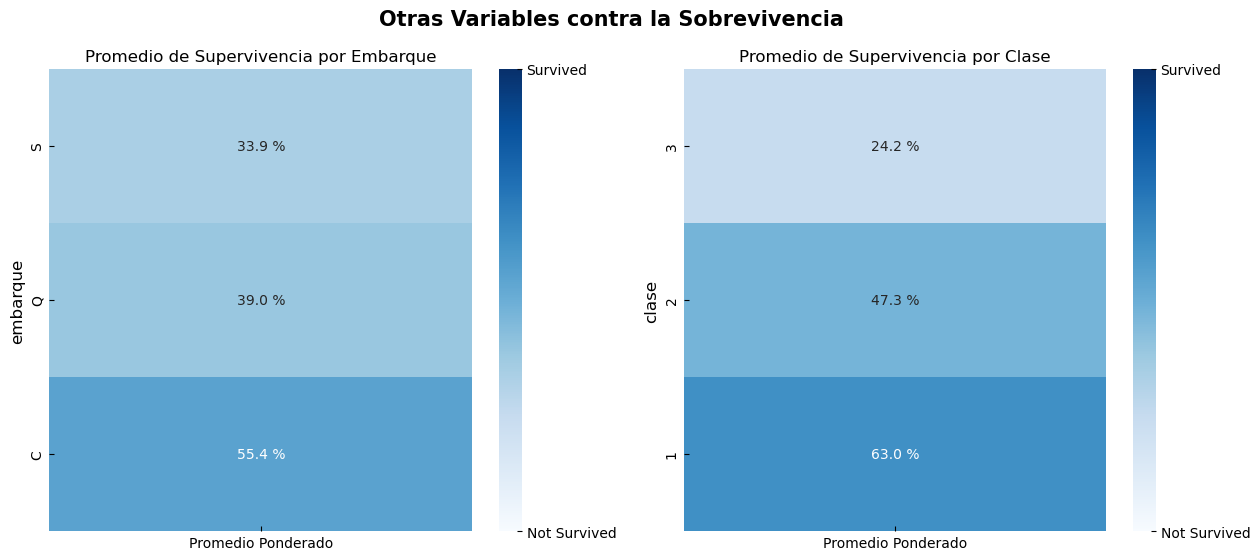

In [49]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Creamos el dataset
survived_embarque = df.pivot_table(values= "survived", index="embarque", aggfunc='mean').sort_values(by="embarque", ascending= False) * 100
survived_clase = df.pivot_table(values= "survived", index="clase", aggfunc='mean').sort_values(by= "clase", ascending= False) * 100

# Creamos el primer gráfico
plt.subplot(121)
heatmap_embarque = sns.heatmap(survived_embarque, annot=True, cmap = "Blues",vmin=0, vmax=100, fmt= ".1f")

# Creamos el segundo gráfico
plt.subplot(122)
heatmap_clase = sns.heatmap(survived_clase, annot=True, cmap = "Blues",vmin=0, vmax=100, fmt= ".1f")

# Personalizamos la barra del gráfico
c_bar1 = heatmap_embarque.collections[0].colorbar
c_bar1.set_ticks([100,0])
c_bar1.set_ticklabels(["Survived", "Not Survived"])

c_bar2 = heatmap_clase.collections[0].colorbar
c_bar2.set_ticks([100,0])
c_bar2.set_ticklabels(["Survived", "Not Survived"])

# Personalizamos los valores de los gráficos
for t in heatmap_embarque.texts: t.set_text(t.get_text() + " %")

for t in heatmap_clase.texts: t.set_text(t.get_text() + " %")


# Configuramos el título
plt.suptitle("Otras Variables contra la Sobrevivencia", size = 15, weight = "bold")
axes[1].set_title("Promedio de Supervivencia por Clase", size = 12)
axes[1].set_xticklabels(["Promedio Ponderado"])

axes[0].set_title("Promedio de Supervivencia por Embarque", size = 12)
axes[0].set_xticklabels(["Promedio Ponderado"])

plt.show()

El tipo de embarque y la cabina muestran ser también variables significativas en la superviencia.

Los pasajeros con mayor porcentaje de sobrevivientes se encuentran en el embarque tipo "C" (55,4%) mientras que las otras dos categorías muestran un comportamiento muy inferior (39% para "Q" y 33,9% para "S").

Por otro lado, el tipo de clase es aún más significativa. Los pasajeros de clase 1 (63%) presentan un porcentaje de sobrevivientes más de dos veces mayor a los de la clase 3 (24,2%). Como recordaremos, la mayoría de los pasajeros se encontraban en la clase 3 (55,1% del total de pasajeros).

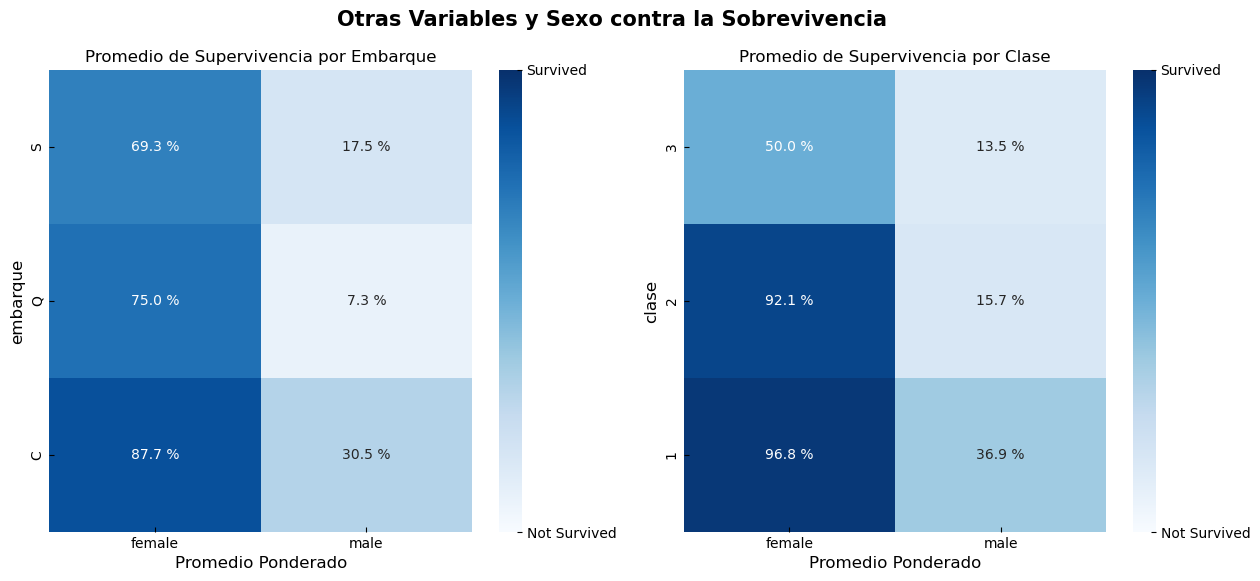

In [50]:
# Creamos las figuras de los gráficos

fig, axes= plt.subplots(figsize = (15,6), nrows=1, ncols=2)

# Creamos la data a gráficar
sexo_clase = df.pivot_table(values= "survived", index="clase", columns="sexo", aggfunc='mean').sort_values(by= "clase", ascending= False) * 100
sexo_embarque = df.pivot_table(values= "survived", index="embarque", columns="sexo", aggfunc='mean').sort_values(by="embarque", ascending= False) * 100

# Creamos el primer gráfico
plt.subplot(121)
heatmap_embarquesexo = sns.heatmap(sexo_embarque, annot=True, cmap = "Blues",vmin=0, vmax=100, fmt= ".1f")

# Creamos el segundo gráfico
plt.subplot(122)
heatmap_clasesexo = sns.heatmap(sexo_clase, annot=True, cmap = "Blues",vmin=0, vmax=100, fmt= ".1f")

# Personalizamos la barra del gráfico
c_bar1 = heatmap_embarquesexo.collections[0].colorbar
c_bar1.set_ticks([100,0])
c_bar1.set_ticklabels(["Survived", "Not Survived"])

c_bar2 = heatmap_clasesexo.collections[0].colorbar
c_bar2.set_ticks([100,0])
c_bar2.set_ticklabels(["Survived", "Not Survived"])

# Personalizamos los valores de los gráficos
for t in heatmap_embarquesexo.texts: t.set_text(t.get_text() + " %")

for t in heatmap_clasesexo.texts: t.set_text(t.get_text() + " %")

# Configuramos el título
plt.suptitle("Otras Variables y Sexo contra la Sobrevivencia", size = 15, weight = "bold")
axes[1].set_title("Promedio de Supervivencia por Clase", size = 12)
axes[1].set_xlabel("Promedio Ponderado")

axes[0].set_title("Promedio de Supervivencia por Embarque", size = 12)
axes[0].set_xlabel("Promedio Ponderado")


plt.show()

Si desglosamos el embarque y la clase por sexo, se pueden representar de manera visual las diferencias entre los hombres y mujeres. Las mujeres de clase 1 sobrevivieron en un 96,8% comparado con un 36,9% de los hombres en la misma clase. El valor más bajo de las mujeres se encuentra en la clase 3 (50%) y se encuentra muy por encima del promedio general de todos los pasajeros de dicha cabina que evaluamos anteriormente (23,2%).

El embarque se comporta de manera similar que el tipo de clase para las mujeres, con la diferencia de poseer valores no tan elevados. Sin embargo, para los hombres el peor promedio de sobrevivientes es en la clase "Q" (7,3%), el cual es significativamente menor que el promedio generar en dicho tipo de embarque si contamos ambos sexos (39%).

### Conclusiones

Tras analalizar y graficar los resultados, hemos concluido que:

- El sexo y la tipo de cabina son las principales variables que afectaron a la sobrevivencia de los pasajeros. 
- Al ser la cabina una variable ordinal ligada al tipo de pasaje que adquirieron los pasajeros, la tarifa está altamente relacionada con nuestra variable hipotesis (los pasajeros de cabina 1 obtuvieron tarifas más elevadas).
- La edad constituye también un factor secundario importante en la sobrevivencia de los pasajeros, sin embargo no se comporta de manera igual para ambos sexos. A mayor edad menor probabilidad de sobrevivir para los hombres, y para las mujeres el rango de edad entre los 20 y 60 años.
- El tipo de embarque también demostró ser significativo con la variable hipotesis, al existir cabinas con mucho mayor promedio de sobrevivientes que otras.
- El numéro de familiares a bordo no se relacionó directamente con nuestra variable hipotesis, más sin embargo, al estar correlacionada positivamente con la tarifa pudiese ser en algunos casos significativa (si se incluyen positivamente los factores principales antes mencionados).


## Modelado predictivo

In [51]:
# Importamos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [52]:
# Seleccionamos las variables de input
X = df[["clase", "sexo", "sib_sp", "parch", "tarifa", "embarque", "pronombre", "edad", "edad_ran"]].copy(deep=True)

# Aislamos la variable a predecir
Y = df["survived"].copy(deep=True)

#### Realizamos las últimas modificaciones a nuestro dataset

In [53]:
# Creamos una función para generar una nueva subcategoría
def pronombre_ran(pronombre):
    nuevo_pronombre = ""
    if pronombre != "Mr." and pronombre != "Miss." and pronombre != "Mrs." and pronombre != "Master.":
        nuevo_pronombre = "Other"
    else:
        nuevo_pronombre = pronombre
    return nuevo_pronombre

In [54]:
# Aplicamos la función y comprobamos las categorías en la varible
X["pronombre"] = X["pronombre"].apply(pronombre_ran)
X["pronombre"].value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
Other       27
Name: pronombre, dtype: int64

<div class="alert alert-block alert-info">
    <b>Note: Creamos una nueva subcategoría con los categorías de menor frecuencia.</b>
</div>

#### Convertimos las etiquetas a números

In [55]:
# Lista con variables
cat_var_list = ["sexo", "embarque", "pronombre", "edad_ran"]

# Convertimos a número y creamos diccionario con el encoder
le_dict = {}
for cat_var in cat_var_list:
    le = LabelEncoder()
    X[cat_var] = le.fit_transform(X[cat_var])
    le_dict[cat_var] = le

In [56]:
X

,clase,sexo,sib_sp,parch,tarifa,embarque,pronombre,edad,edad_ran
PassengerId,,,,,,,,,
1,3,1,1,0,7.2500,2,2,22,1
2,1,0,1,0,71.2833,0,3,38,1
3,3,0,0,0,7.9250,2,1,26,1
4,1,0,1,0,53.1000,2,3,35,1
5,3,1,0,0,8.0500,2,2,35,1
...,...,...,...,...,...,...,...,...,...
887,2,1,0,0,13.0000,2,4,27,1
888,1,0,0,0,30.0000,2,1,19,0
889,3,0,1,2,23.4500,2,1,22,3


#### Estandarizamos los valores numéricos

In [57]:
# Lista con valores numéricos
numeric_var_list = ["tarifa", "edad"]

# Estandarizamos los valores
scaler_dict = {}
for num_var in numeric_var_list:
    se = StandardScaler()
    X[num_var] = se.fit_transform(X[num_var].to_numpy().reshape(-1,1))
    scaler_dict[num_var] = se

X.head(5)

,clase,sexo,sib_sp,parch,tarifa,embarque,pronombre,edad,edad_ran
PassengerId,,,,,,,,,
1,3,1,1,0,-0.724935,2,2,-0.582137,1
2,1,0,1,0,1.622214,0,3,0.625334,1
3,3,0,0,0,-0.700193,2,1,-0.280269,1
4,1,0,1,0,0.955703,2,3,0.398933,1
5,3,1,0,0,-0.695611,2,2,0.398933,1


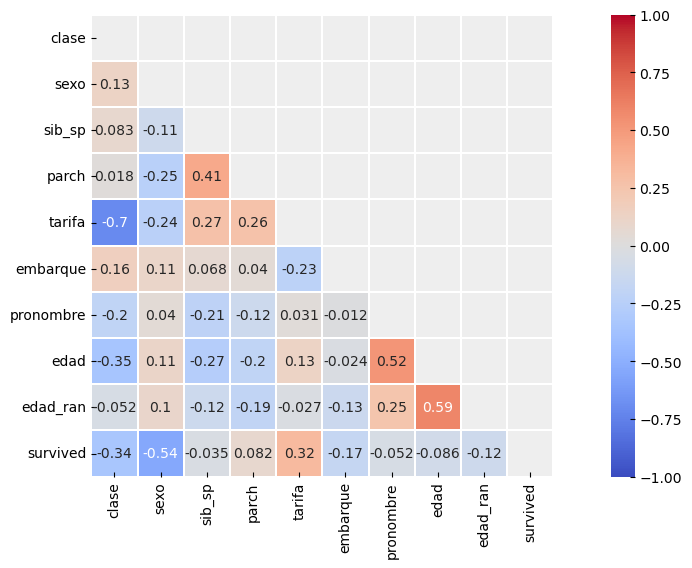

In [58]:
# Guardamos una copia de nuestra variable
X_for_corr = X.copy()
X_for_corr["survived"] = Y

# Cremamos la matriz
corr_matrix = X_for_corr.corr()

# Creamos la figura del gráficos
fig, axes= plt.subplots(figsize = (15,6))

# Modificamos la matroz para efectos visuales
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Creamos el gráfico
sns.heatmap(corr_matrix, annot=True, linewidths=.3, linecolor="white", vmin= -1, vmax=1,square= True,mask=mask, cmap="coolwarm")

plt.show()

Las variables más influyentes con respecto a la variable hipótesis son el sexo, la clase y la tarifa (como bien se describió anteriormente). Seguidamente, el embarque presenta también una correlación mayor al resto de variables no mencionadas.

Observamos que la edad como valor numérico presenta menor correlación que la edad por rangos a comparación con nuestra variable hipótesis. A su vez, la correlación entre la edad y la edad por rangos es considerable pero no lo suficiente como para eliminar alguna de las dos.

#### Algoritmo de regresión logística

In [59]:
# Dividimos el dataset en Entrenamiento/Validación
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [60]:
# Entrenamos el algoritmo
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Función para calcular el porcentaje de aciertos
def accuracy(ground_truth, predictions):
    comp = list(ground_truth == predictions)
    n_true = comp.count(True)
    n_false = comp.count(False)
    return n_true/(n_true + n_false)

In [62]:
# Realizamos las predicciones y las comparamos con los resultados reales
predictions_train = logisticRegr.predict(X_train)
ground_truth_train = y_train.to_numpy().reshape(-1)

In [63]:
acertividad_train = round(accuracy(ground_truth_train, predictions_train) * 100, 2)
print("Porcentaje de acertividad con la data de entrenamiento: " + str(acertividad_train) + "%")

Porcentaje de acertividad con la data de entrenamiento: 80.06%


In [64]:
predictions_test = logisticRegr.predict(X_test)
ground_truth_test = y_test.to_numpy().reshape(-1)
acertividad_test = round(accuracy(ground_truth_test, predictions_test) * 100, 2)
print("Porcentaje de acertividad con la data de prueba: " + str(acertividad_test) + "%")

Porcentaje de acertividad con la data de prueba: 80.45%
